
# DA-AG-0010 — Bagging & Boosting, KNN & Stacking  





## Question 1
**What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Answer:**  
Ensemble learning combines predictions from multiple models to achieve **lower generalization error** than any single model. Diversity among models helps cancel out individual errors.

- **Bagging (Bootstrap Aggregating):**  
  - **Approach:** Train many models **independently** on different bootstrap samples (sampling with replacement) of the training data; aggregate via **averaging** (regression) or **majority vote** (classification).  
  - **Objective:** Reduce **variance** (especially for high-variance learners like decision trees). Each model has equal weight; no focus on previous mistakes.

- **Boosting:**  
  - **Approach:** Train models **sequentially**, where each new weak learner focuses on the **errors** of the previous ones (by reweighting examples or fitting residuals).  
  - **Objective:** Reduce **bias** (while possibly increasing variance if overfit); later learners get **higher influence** on hard-to-classify examples.



## Question 2
**Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**Answer:**  
Random Forest reduces overfitting by injecting **two sources of randomness**:

1. **Bootstrap sampling of rows** per tree (bagging) → decorrelates trees and lowers variance.  
2. **Random feature subspacing** at each split (e.g., `max_features`) → prevents dominant predictors from driving all trees to the same structure.

Two key hyperparameters:
- **`n_estimators`** — number of trees. More trees generally reduce variance and stabilize predictions (with diminishing returns).  
- **`max_features`** — number (or fraction) of features considered at each split. Smaller values **increase tree diversity** and typically reduce overfitting.  
(Other helpful controls include `max_depth` / `min_samples_leaf` to limit tree complexity.)



## Question 3
**What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Answer:**  
**Stacking (stacked generalization)** trains **heterogeneous base models** (level‑0 learners) on the same data, then trains a **meta‑learner** (level‑1) on their out‑of‑fold predictions to learn how to best combine them.

**Differences:**  
- Bagging uses many **copies of the same learner** on resampled data and aggregates simply (vote/mean).  
- Boosting uses **sequential weak learners** focusing on prior errors.  
- **Stacking** learns a **model to combine models**; base learners can be diverse (e.g., tree, SVM, logistic regression).

**Example use case:**  
For a tabular churn problem, train **LogisticRegression**, **RandomForest**, and **GradientBoosting** as base models; use **LogisticRegression** (or a small tree) as a meta‑learner on their out‑of‑fold predictions to capture complementary strengths and improve AUC.



## Question 4
**What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Answer:**  
With bootstrap sampling, each tree is trained on about **63%** of the data; the remaining **out‑of‑bag (OOB)** samples (~37%) for that tree act as **built‑in validation data**. The **OOB score** aggregates predictions for each training instance using only the trees where it was OOB, yielding an **unbiased estimate** of generalization performance **without needing a separate validation set** or cross‑validation.



## Question 5
**Compare AdaBoost and Gradient Boosting in terms of: handling errors, weight adjustment, and typical use cases.**

**Answer:**  
- **How they handle errors from weak learners**  
  - **AdaBoost:** Emphasizes misclassified examples by **increasing sample weights** before fitting the next weak learner.  
  - **Gradient Boosting:** Fits the next learner to the **negative gradient (residuals)** of a chosen loss function.

- **Weight adjustment mechanism**  
  - **AdaBoost:** Updates **sample weights** and assigns each learner a **stage weight** based on its error.  
  - **Gradient Boosting:** Keeps sample weights fixed; updates the **model function** via additive steps along the gradient; uses **learning rate** and **tree depth** to regularize.

- **Typical use cases**  
  - **AdaBoost:** Shallow trees (decision stumps) for fast, robust classification; works well when noise is moderate.  
  - **Gradient Boosting:** Flexible (classification/regression); with modern variants (XGBoost/LightGBM/CatBoost) excels on **tabular** problems and competitions.



## Question 6
**Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Answer:**  
CatBoost uses **ordered target statistics** (a form of target encoding) computed with **permutation‑driven, leak‑free** schemes and **ordered boosting** to avoid target leakage. It converts categorical features into numeric **Category Target Rates (CTRs)** using only **past** examples in a random permutation, optionally with priors and combinations of categories. This built‑in handling removes the need for manual one‑hot encoding and often yields **strong performance with minimal preprocessing**.



## Question 7 — KNN Classifier: Wine Dataset Analysis with Optimization

**Tasks:**  
1) Load `sklearn.datasets.load_wine()`  
2) 70/30 train–test split  
3) KNN (K=5) **without scaling** → report Accuracy & Classification Report  
4) Apply `StandardScaler`, retrain KNN, compare metrics  
5) `GridSearchCV` over **K = 1..20** and **distance ∈ {euclidean, manhattan}**  
6) Train the optimized KNN and compare to earlier models


Unscaled KNN (k=5) Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Scaled KNN (k=5) Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 6}
Best CV accuracy: 0.9756666666666666
Optimized KNN Test Accuracy: 0.96296296296

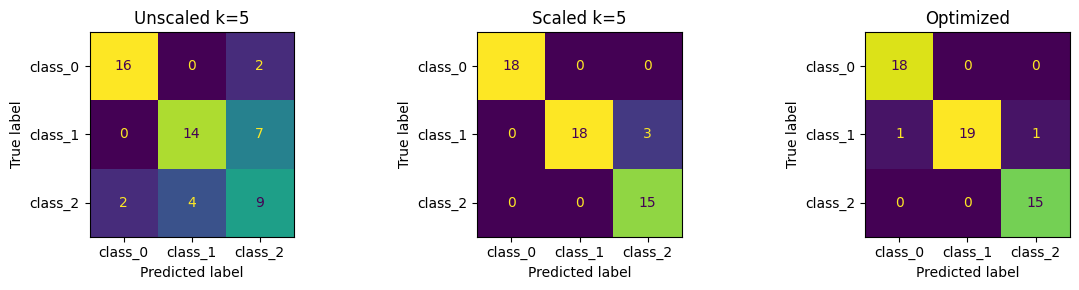

In [1]:

# Q7 Implementation
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load data
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. KNN without scaling
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, pred_raw)
print("Unscaled KNN (k=5) Accuracy:", acc_raw)
print(classification_report(y_test, pred_raw, target_names=wine.target_names))

# 4. With StandardScaler
pipe_scaled = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
pipe_scaled.fit(X_train, y_train)
pred_scaled = pipe_scaled.predict(X_test)
acc_scaled = accuracy_score(y_test, pred_scaled)
print("Scaled KNN (k=5) Accuracy:", acc_scaled)
print(classification_report(y_test, pred_scaled, target_names=wine.target_names))

# 5. GridSearchCV for best k and metric
param_grid = {
    "knn__n_neighbors": list(range(1, 21)),
    "knn__metric": ["euclidean", "manhattan"],
}
grid = GridSearchCV(Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]),
                    param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# 6. Evaluate optimized model
best_model = grid.best_estimator_
pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, pred_best)
print("Optimized KNN Test Accuracy:", acc_best)
print(classification_report(y_test, pred_best, target_names=wine.target_names))

# Optional visualization: confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for ax, yhat, title in zip(axes, [pred_raw, pred_scaled, pred_best],
                           ["Unscaled k=5", "Scaled k=5", "Optimized"]):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, yhat, display_labels=wine.target_names, ax=ax, colorbar=False)
    ax.set_title(title)
plt.tight_layout()
plt.show()



## Question 8 — PCA + KNN with Variance Analysis and Visualization

**Tasks:**  
1) Load `sklearn.datasets.load_breast_cancer()`  
2) Plot scree plot (explained variance ratio)  
3) Retain **95%** variance and transform  
4) Train KNN on original vs. PCA‑transformed data; compare accuracy  
5) Scatter of first two principal components colored by class


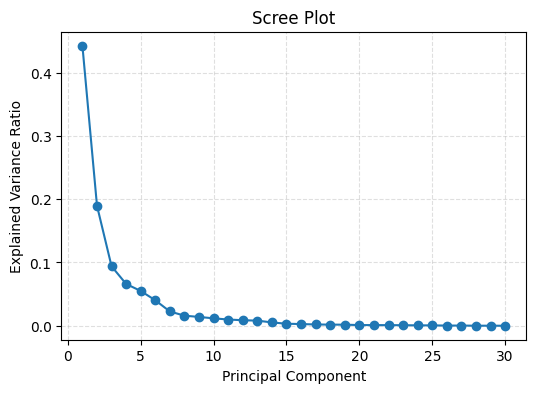

Accuracy — Original (k=5): 0.9591
Accuracy — PCA 95% (k=5): 0.9532


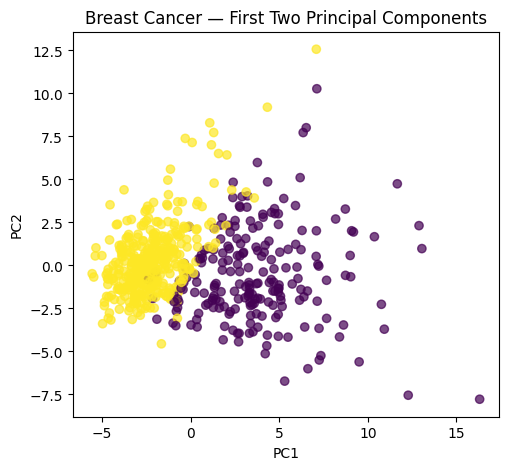

In [2]:

# Q8 Implementation
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2) Scree plot using standardized features (PCA assumes centered data)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca_full = PCA()
pca_full.fit(X_std)
explained = pca_full.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# 3) Retain 95% variance
pca95 = PCA(n_components=0.95)

pipe_original = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
pipe_pca = Pipeline([("scaler", StandardScaler()), ("pca", pca95), ("knn", KNeighborsClassifier(n_neighbors=5))])

pipe_original.fit(X_train, y_train)
pipe_pca.fit(X_train, y_train)

pred_orig = pipe_original.predict(X_test)
pred_pca = pipe_pca.predict(X_test)

acc_orig = accuracy_score(y_test, pred_orig)
acc_pca = accuracy_score(y_test, pred_pca)
print(f"Accuracy — Original (k=5): {acc_orig:.4f}")
print(f"Accuracy — PCA 95% (k=5): {acc_pca:.4f}")

# 5) Scatter of first two PCs
X_pca2 = PCA(n_components=2).fit_transform(X_std)
plt.figure(figsize=(5.5,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Breast Cancer — First Two Principal Components")
plt.show()



## Question 9 — KNN Regressor with Distance Metrics and K-Value Analysis

**Tasks:**  
1) Generate synthetic regression dataset (`make_regression(n_samples=500, n_features=10)`)  
2) Train KNN Regressor with **Euclidean** (K=5) and **Manhattan** (K=5); compare **MSE**  
3) Test K ∈ {1, 5, 10, 20, 50} and plot **K vs. MSE** (bias–variance trade‑off)


MSE (Euclidean, k=5): 5829.710
MSE (Manhattan, k=5): 6771.998


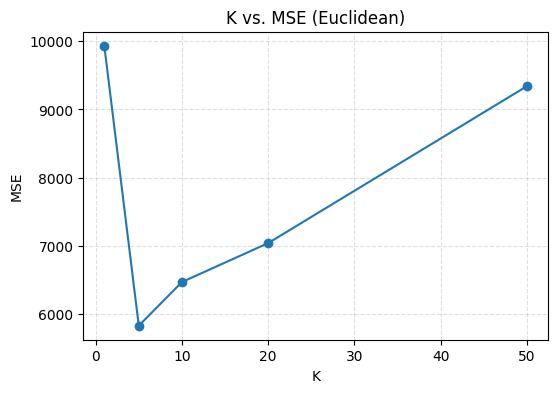

In [13]:

# Q9 Implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=500, n_features=10, n_informative=8, noise=15.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_knn_reg(metric, k=5):
    pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor(n_neighbors=k, metric=metric))])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    return mse

mse_euclid = evaluate_knn_reg("euclidean", 5)
mse_manh = evaluate_knn_reg("manhattan", 5)
print(f"MSE (Euclidean, k=5): {mse_euclid:.3f}")
print(f"MSE (Manhattan, k=5): {mse_manh:.3f}")

Ks = [1, 5, 10, 20, 50]
mses = [evaluate_knn_reg("euclidean", k) for k in Ks]

plt.figure(figsize=(6,4))
plt.plot(Ks, mses, marker='o')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("K vs. MSE (Euclidean)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()



## Question 10 — KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Pima Indians Diabetes)

**Dataset:** `diabetes.csv` (Pima Indians Diabetes).  

**Tasks:**  
1) Load dataset (contains missing values)  
2) `KNNImputer` to fill missing values (treat structural zeros in certain columns as missing)  
3) Train KNN using **Brute-force**, **KD-Tree**, **Ball Tree**  
4) Compare **training time** and **accuracy**  
5) Plot **decision boundary** for the best-performing method using the **two most important features**


In [12]:
# Q10. Implementation

import pandas as pd
import numpy as np
import os, time
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# 1) Load dataset
possible_paths = ["diabetes.csv", "/mnt/data/diabetes.csv", "./data/diabetes.csv"]
path = None
for p in possible_paths:
    if os.path.exists(p):
        path = p
        break

if path is None:
    raise FileNotFoundError("Place 'diabetes.csv' in the notebook directory or /mnt/data")

df = pd.read_csv(path)

# If 'Outcome' column is missing, assign names manually
if 'Outcome' not in df.columns:
    print("⚠ No 'Outcome' column found — adding default column names.")
    df = pd.read_csv(path, header=None)
    df.columns = [
        "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
    ]

print("✅ Dataset Loaded. Columns:", list(df.columns))

# 2) Replace zero values as NaN for realistic medical columns
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_as_missing:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)

X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

imputer = KNNImputer(n_neighbors=5)
scaler = StandardScaler()

# 3) Train KNN using different algorithms and measure time/accuracy
def fit_time_and_score(algorithm):
    pipe = Pipeline([
        ("imputer", imputer),
        ("scaler", scaler),
        ("knn", KNeighborsClassifier(n_neighbors=7, algorithm=algorithm))
    ])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    t0 = time.time()
    pipe.fit(X_train, y_train)
    t1 = time.time() - t0
    acc = accuracy_score(y_test, pipe.predict(X_test))
    return t1, acc, pipe, (X_train, X_test, y_train, y_test)

results = {}
for algo in ["brute", "kd_tree", "ball_tree"]:
    fit_time, acc, model, splits = fit_time_and_score(algo)
    results[algo] = {"time": fit_time, "acc": acc, "model": model, "splits": splits}
    print(f"{algo.upper()} → Time: {fit_time:.4f}s | Accuracy: {acc:.4f}")

# Best algorithm
best_algo = sorted(results.keys(), key=lambda a: (-results[a]["acc"], results[a]["time"]))[0]
print(f"\n✅ Best Algorithm Selected: {best_algo.upper()}")

best_model = results[best_algo]["model"]
X_train, X_test, y_train, y_test = results[best_algo]["splits"]

# 4) Feature importance — pick top two using mutual information
feature_names = [c for c in df.columns if c != "Outcome"]
X_processed = best_model.named_steps["imputer"].fit_transform(df[feature_names])
X_processed = best_model.named_steps["scaler"].fit_transform(X_processed)

mi = mutual_info_classif(X_processed, y, random_state=42)
top2_idx = np.argsort(mi)[-2:][::-1]
top2_names = [feature_names[i] for i in top2_idx]
print("🔹 Top 2 Features for Decision Boundary Plot:", top2_names)

# 5) Use only these 2 features for visualization
X2 = df[top2_names].copy()

# Replace missing in X2 only where required
cols_to_clean = [col for col in zero_as_missing if col in X2.columns]
if cols_to_clean:
    X2[cols_to_clean] = X2[cols_to_clean].replace(0, np.nan)

X2


✅ Dataset Loaded. Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
BRUTE → Time: 0.0214s | Accuracy: 0.7619
KD_TREE → Time: 0.0205s | Accuracy: 0.7619
BALL_TREE → Time: 0.0199s | Accuracy: 0.7619

✅ Best Algorithm Selected: BALL_TREE
🔹 Top 2 Features for Decision Boundary Plot: ['Glucose', 'BMI']


,Glucose,BMI
0,148.0,33.6
1,85.0,26.6
2,183.0,23.3
3,89.0,28.1
4,137.0,43.1
...,...,...
763,101.0,32.9
764,122.0,36.8
765,121.0,26.2
766,126.0,30.1
